In [39]:
import pandas as pd
from pandas import DataFrame

In [40]:
dados = pd.read_csv('netflix_titles.csv')

In [41]:
df = DataFrame(dados)

In [42]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [43]:
df.shape

(8807, 12)

Verificando se há dados duplicados

In [44]:
df.duplicated().sum()

0

Verificando se há valores ausentes no DataFrame e corrigindo.

In [45]:
df.isnull().any().any()

True

In [46]:
data = df.fillna('Desconhecido')

In [47]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Desconhecido,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Desconhecido,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Desconhecido,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Desconhecido,Desconhecido,Desconhecido,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Desconhecido,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Desconhecido,Desconhecido,Desconhecido,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Analise e distribuição de filmes e séries por tipo (filme ou série) e país de origem.

In [48]:
top_paises_por_tipo = data[data['type'].isin(['Movie', 'TV Show'])].groupby(['type', 'country']).size().groupby('type', group_keys=False).nlargest(10)

In [49]:
import matplotlib.pyplot as plt

In [50]:
cores = plt.cm.get_cmap('tab20')

C:\Users\emers\AppData\Local\Temp\ipykernel_10772\2782346199.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cores = plt.cm.get_cmap('tab20')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


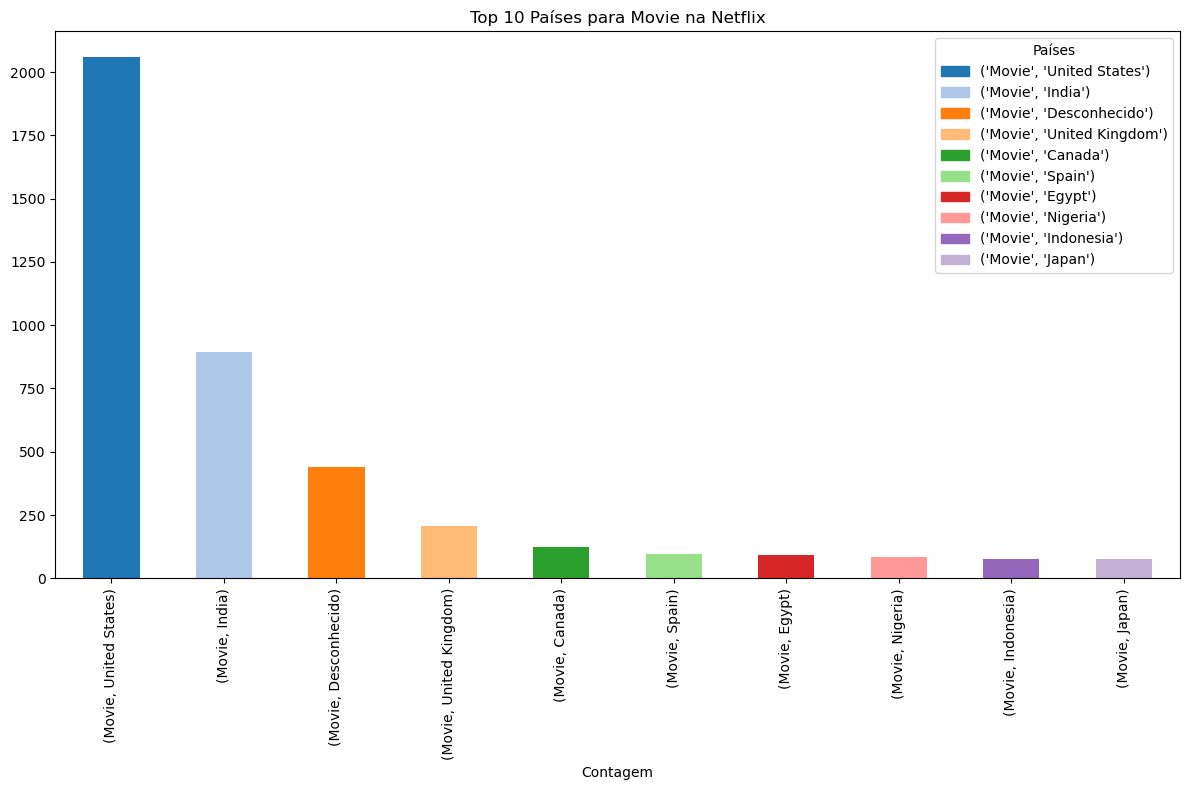

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


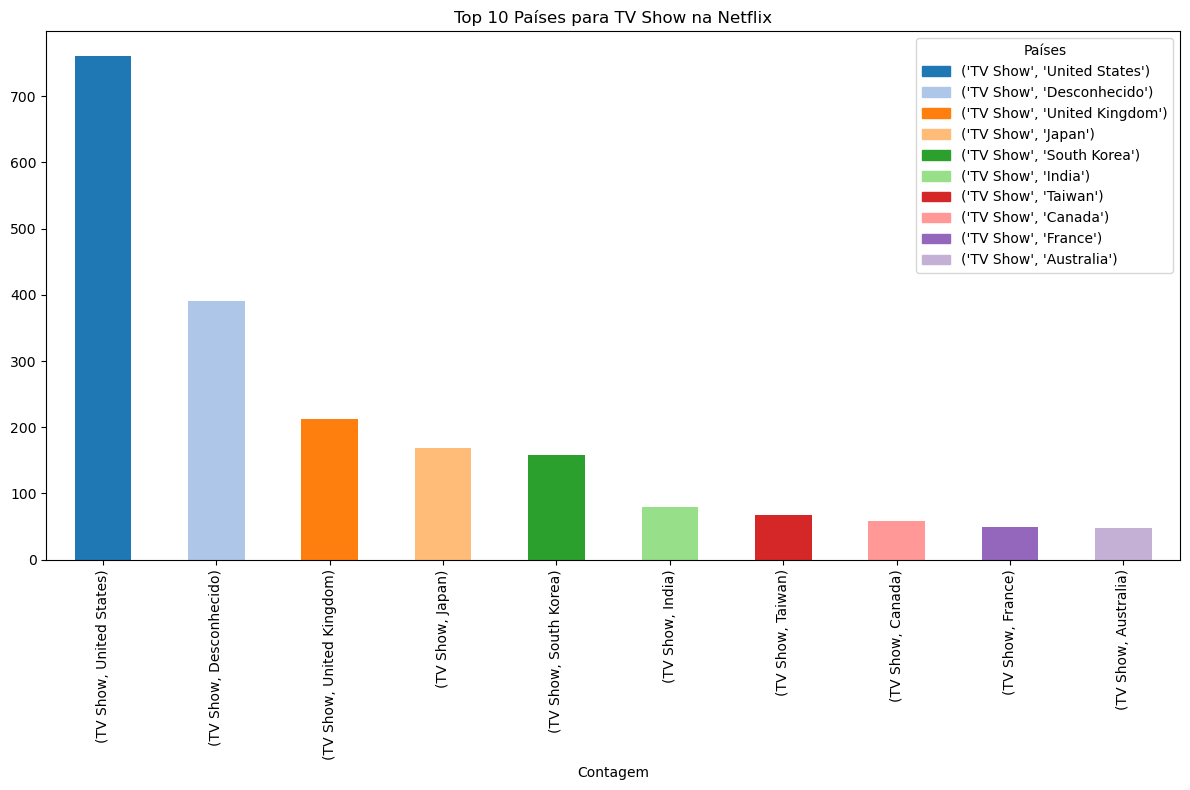

In [51]:
for tipo, dados in top_paises_por_tipo.groupby(level=0):
    plt.figure(figsize=(12, 8))
    ax = dados.plot(kind='bar', color=cores(range(len(dados))))
    plt.title(f'Top 10 Países para {tipo} na Netflix')
    plt.xlabel('País')
    plt.xlabel('Contagem')
    plt.xticks(rotation=90)

    ax.legend().remove()

    handles = [plt.Rectangle((0,0),1,1, color=cores(i), label=label) for i, label in enumerate(dados.index)]
    plt.legend(handles=handles, loc='best', title='Países')

    plt.tight_layout()
    plt.show()

Podemos ver nos gráficos acima que o Estados Unidos é o principal país entre filmes e series com mais produções no Netflix.

In [52]:
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

In [53]:
data = data.dropna(subset=['date_added'])

In [54]:
content_additions = data.groupby(pd.Grouper(key='date_added', freq='M')).size()

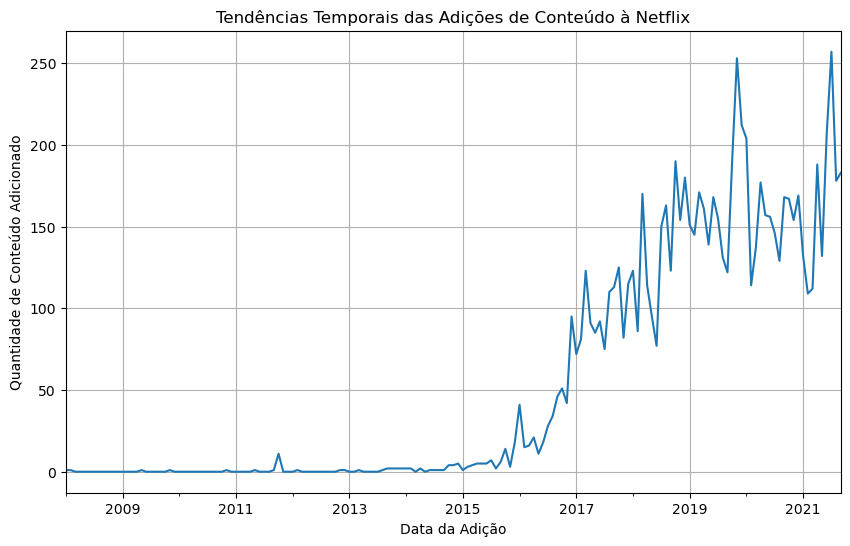

In [55]:
plt.figure(figsize=(10, 6))
content_additions.plot()
plt.title('Tendências Temporais das Adições de Conteúdo à Netflix')
plt.xlabel('Data da Adição')
plt.ylabel('Quantidade de Conteúdo Adicionado')
plt.grid(True)
plt.show()

O gráfico acima mostra as tendências temporais das adições de conteúdo à Netflix ao longo do tempo.
Observando o gráfico, podemos notar padrões sazonais ou períodos de pico de lançamento. Houve picos recorrentes em determinados meses ou anos que teve mais lançamentos de filmes e series na plataforma Netflix, por outro lado tem algumas partes que ficaram mais planas, onde não houve tantos lançamentos na plataforma.

In [56]:
diretores_filmes = data[data['type'] == 'Movie']['director'].value_counts().head(5)

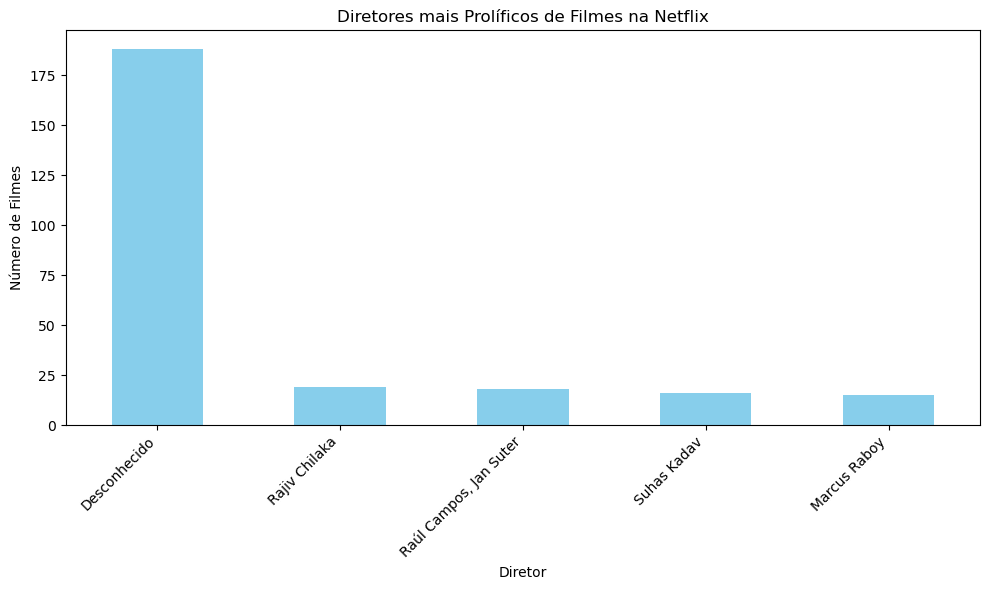

In [57]:
plt.figure(figsize=(10, 6))
diretores_filmes.plot(kind='bar', color='skyblue')
plt.title('Diretores mais Prolíficos de Filmes na Netflix')
plt.xlabel('Diretor')
plt.ylabel('Número de Filmes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [58]:
elenco_filmes = data[data['type'] == 'Movie']['cast'].explode().value_counts().head(5)

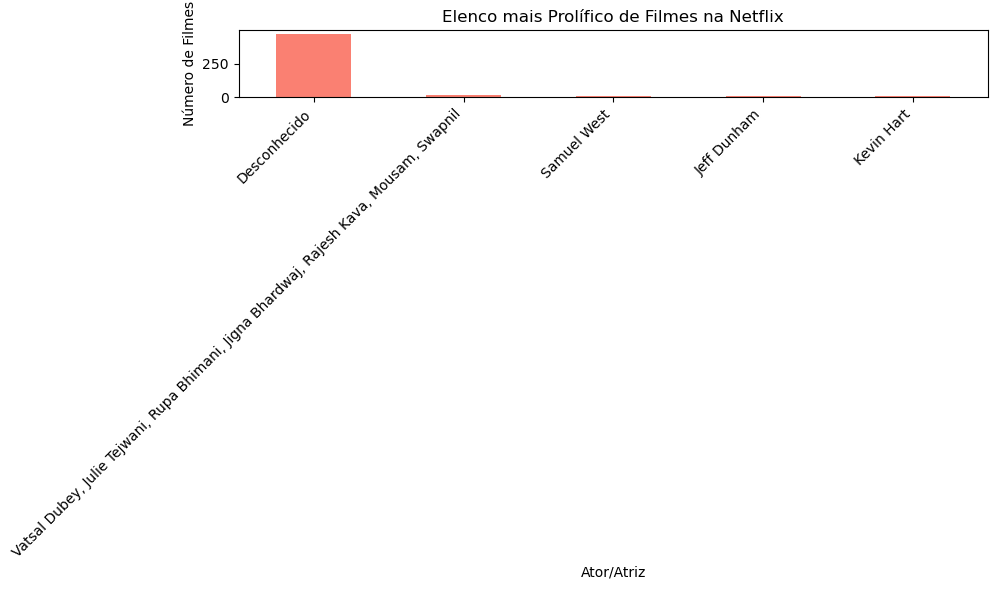

In [59]:
plt.figure(figsize=(10, 6))
elenco_filmes.plot(kind='bar', color='salmon')
plt.title('Elenco mais Prolífico de Filmes na Netflix')
plt.xlabel('Ator/Atriz')
plt.ylabel('Número de Filmes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [60]:
diretores_series = data[data['type'] == 'TV Show']['director'].value_counts().head(5)

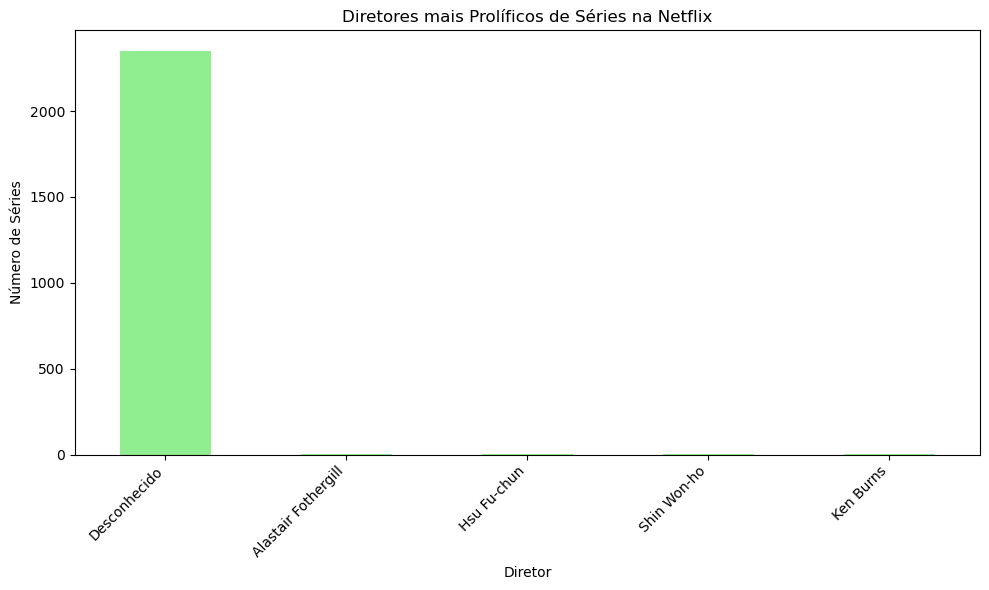

In [61]:
plt.figure(figsize=(10, 6))
diretores_series.plot(kind='bar', color='lightgreen')
plt.title('Diretores mais Prolíficos de Séries na Netflix')
plt.xlabel('Diretor')
plt.ylabel('Número de Séries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [62]:
elenco_series = data[data['type'] == 'TV Show']['cast'].explode().value_counts().head(5)

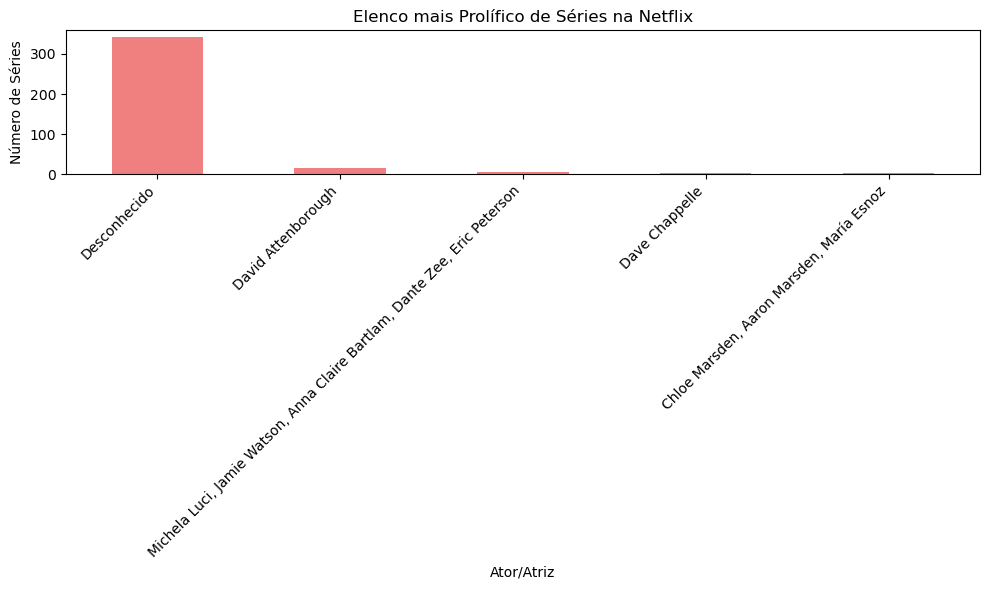

In [63]:
plt.figure(figsize=(10, 6))
elenco_series.plot(kind='bar', color='lightcoral')
plt.title('Elenco mais Prolífico de Séries na Netflix')
plt.xlabel('Ator/Atriz')
plt.ylabel('Número de Séries')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Como podemos ver está é a analise estatistica que mostra os dados dos diretos e elenco que mais aparece em series e filmes da Netflix

Logo abaixo realizei uma analise por média de duração dos filmes e series da Netflix

In [64]:
data = data[data['duration'] != 'Desconhecido']

In [65]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Desconhecido,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Desconhecido,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Desconhecido,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Desconhecido,Desconhecido,Desconhecido,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Desconhecido,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Desconhecido,Desconhecido,Desconhecido,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [66]:
def converter_duracao(duracao):
    if 'min' in duracao:
        return int(duracao.split()[0])
    elif 'temporadas' in duracao:
        return int(duracao.split()[0]) * 45

In [67]:
def converter_temporadas(temporadas):
    if 'temporadas' in temporadas:
        return int(temporadas.split()[0])
    else:
        return 1

In [68]:
data['duração_min'] = data['duration'].apply(converter_duracao)
data['temporadas_num'] = data['duration'].apply(converter_temporadas)

In [69]:
duracao_media_por_tipo = data.groupby('type')['duração_min'].mean()
duracao_media_por_tipo = data.groupby('type')['temporadas_num'].mean()


In [70]:
duracao_media_por_tipo

type
Movie      1.0
TV Show    1.0
Name: temporadas_num, dtype: float64

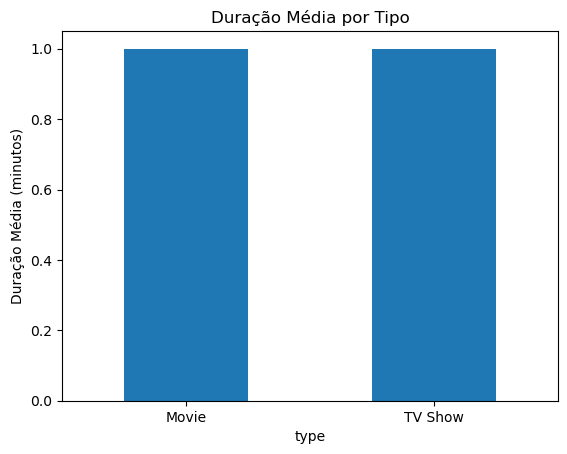

In [71]:
fig, ax = plt.subplots()
duracao_media_por_tipo.plot(kind='bar', ax=ax)
ax.set_ylabel('Duração Média (minutos)')
ax.set_title('Duração Média por Tipo')
plt.xticks(rotation=0)
plt.show()

Podemos ver que média de tempo de filme e série é  parecida

In [72]:
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duração_min,temporadas_num
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Desconhecido,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,1
1,s2,TV Show,Blood & Water,Desconhecido,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,1
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Desconhecido,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1
3,s4,TV Show,Jailbirds New Orleans,Desconhecido,Desconhecido,Desconhecido,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1
4,s5,TV Show,Kota Factory,Desconhecido,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0,1
8803,s8804,TV Show,Zombie Dumb,Desconhecido,Desconhecido,Desconhecido,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN,1
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88.0,1
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88.0,1


In [73]:
counts = data['rating'].value_counts()

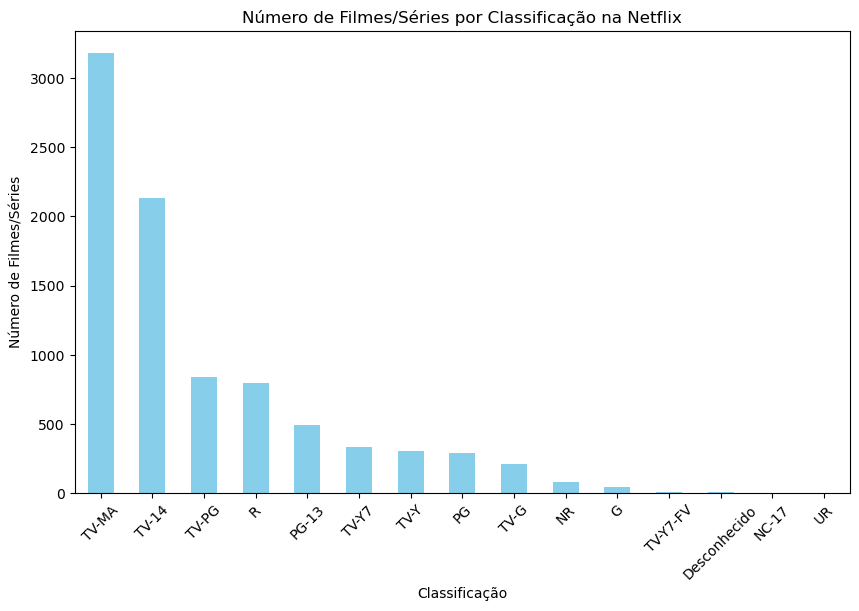

In [74]:
plt.figure(figsize=(10, 6))
counts.plot(kind='bar', color='skyblue')
plt.title('Número de Filmes/Séries por Classificação na Netflix')
plt.xlabel('Classificação')
plt.ylabel('Número de Filmes/Séries')
plt.xticks(rotation=45)
plt.show()

Acima podemos ver a distribuição por classificação de filmes/Series